Дана задача: 

К аналитику обратился риэлтор c задачей выставить ценник для продажи объектов недвижимости площадью 48м2 и 54м2. В ходе работы над задачей аналитик выяснил, что:  

объект 31м2 стоит $19310

объект 51м2 стоит $52150

объект 61м2 стоит $74570

Вопрос: что. сказать риелтору?

In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [31, 51, 61]
y = [19310, 52150, 74570]

In [3]:
def mapping(x, a, b):
    return a * x + b

In [4]:
#также возвращает матрицу ковариации для вычисленных аргументов
res, _ = curve_fit(mapping, x, y)

In [5]:
res

array([  1813.42857518, -37763.42875746])

In [6]:
x = np.arange(30, 70) 

In [7]:
f = 1813.42857518 * x -37763.42875746

In [8]:
x1 = [31, 51, 61]
y1 = [19310, 52150, 74570]

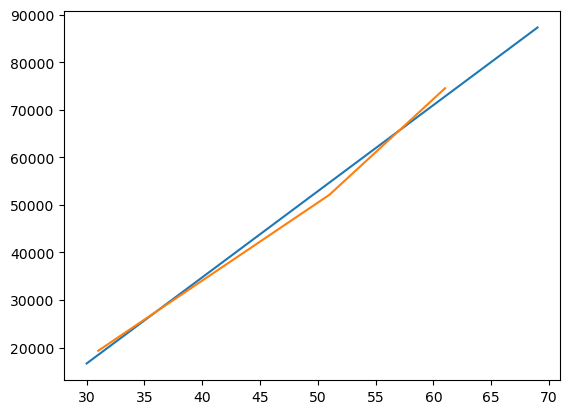

In [9]:
plt.plot(x, f)
plt.plot(x1, y1)
plt.show()

In [10]:
def mapping2(x, a, b, c):
    return a * x ** 2 + b * x + c

In [11]:
res, _ = curve_fit(mapping2, x1, y1)

C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [12]:
res

array([20.,  2., 28.])

In [13]:
f2 = 20 * x ** 2 + 2 * x + 28

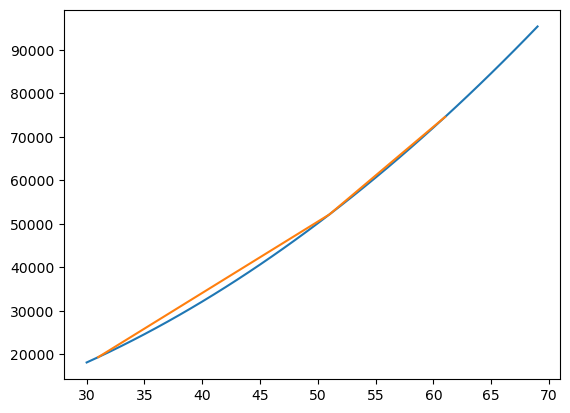

In [14]:
plt.plot(x, f2)
plt.plot(x1, y1)
plt.show()

In [15]:
x = np.arange(48, 55) 

In [16]:
f2 = 20 * x ** 2 + 2 * x + 28

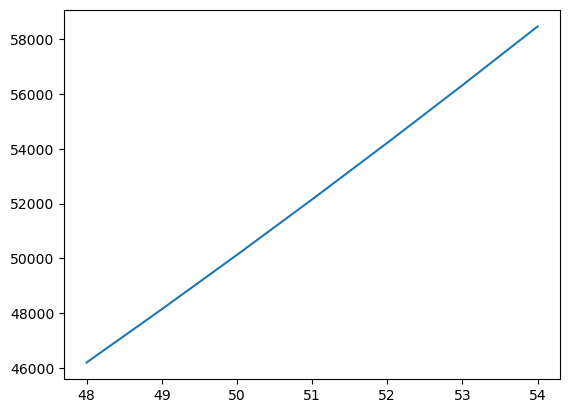

In [17]:
plt.plot(x, f2)
plt.show()

Ответ: 48м2 оценивается в 46000 долларов,  54м2 оценивается в 58000 долларов

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import seaborn as sns

In [19]:
import pandas as pd

In [20]:
X_train = pd.DataFrame(x1)

In [21]:
y_train = pd.Series(y1)

In [22]:
X_train

,0
0,31
1,51
2,61


In [23]:
y_train

0    19310
1    52150
2    74570
dtype: int64

In [24]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 200000], [0, 200000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

R2:	0.993
RMSE:	1851.64
MSE:	3428571.429


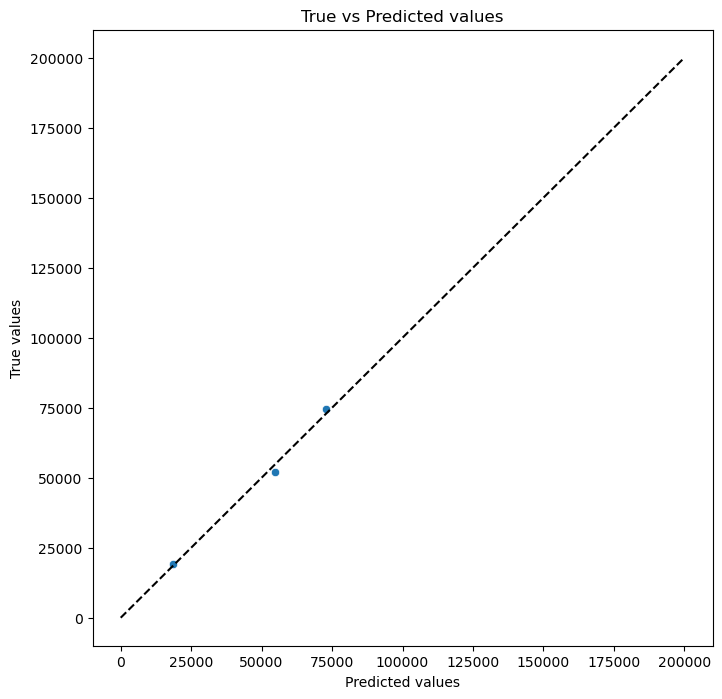

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)

evaluate_preds(y_train, y_train_preds)

In [26]:
X_test = pd.DataFrame([48, 54])

In [27]:
y_test_preds = lr_model.predict(X_test)

y_test_preds

array([49281.14285714, 60161.71428571])

По трем точкам гадать нежелательно, попробуем сгенерировать больше данных

In [28]:
x3 = np.arange(10, 100)
X_train = pd.DataFrame(x3)

In [29]:
y3 = [20 * i ** 2 + 2 * i + 28 + np.random.randn() for i in x3]

In [30]:
y3

[2048.909465114177,
 2468.0626998372604,
 2931.475201218915,
 3434.7253630142095,
 3975.783637182526,
 4556.766071962685,
 5178.930524170396,
 5841.224040011547,
 6543.011326053391,
 7286.589602539805,
 8067.808833456013,
 8889.378917577453,
 9752.20495268358,
 10655.192009241062,
 11594.893073312303,
 12577.984991094294,
 13600.34499545609,
 14662.572249471954,
 15764.692004751376,
 16905.638263963352,
 18088.758875179246,
 19311.31223315255,
 20572.46356102072,
 21872.316760186357,
 23214.89822546161,
 24598.58629016917,
 26020.203939687526,
 27481.52075445852,
 28984.33011929295,
 30524.796164821808,
 32108.562007367862,
 33730.20769510775,
 35390.25825280193,
 37091.90861262876,
 38836.44407738884,
 40617.131848868936,
 42439.77454988371,
 44303.27112451891,
 46203.0919953548,
 48146.72662991835,
 50127.38020273412,
 52150.127806595076,
 54212.755344261845,
 56314.055638887316,
 58455.712803370625,
 60637.16600587081,
 62862.435733573075,
 65121.65523476776,
 67423.07591550011,
 69

In [31]:
y_train = pd.Series(y3)

R2:	0.957
RMSE:	12070.983
MSE:	145708618.616


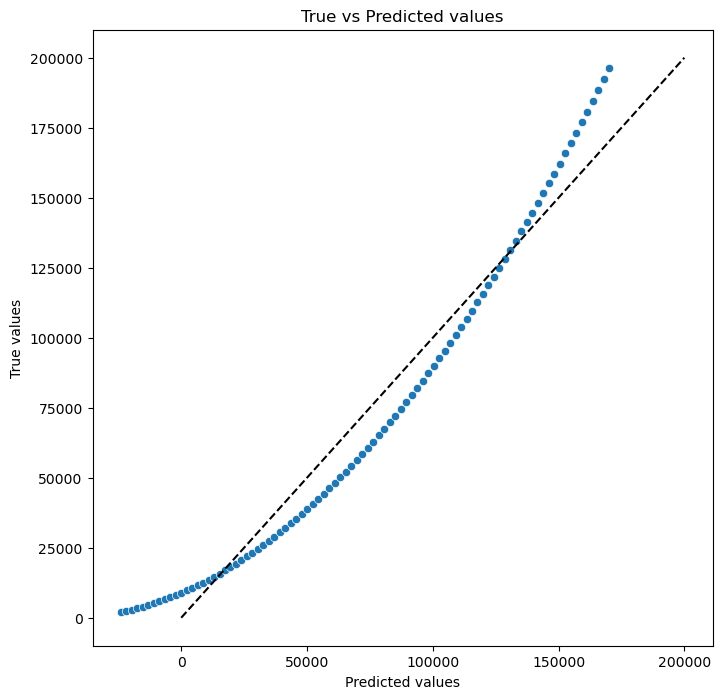

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)

evaluate_preds(y_train, y_train_preds)

In [33]:
X_test = pd.DataFrame([48, 54])

In [34]:
y_test_preds = lr_model.predict(X_test)

y_test_preds

array([58857.29251677, 71949.32490645])